# GRIP : The Spark Foundation - December 2022 

### Task 1 : Prediction using supervised ML 

#### Author : Hemangi Gavande

#### Precentage scored by a student based on study hours

#### Importing all libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# Reading data from remote link
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)


In [6]:
# printing the input data
stud_data = pd.read_csv(url)
print(stud_data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [42]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


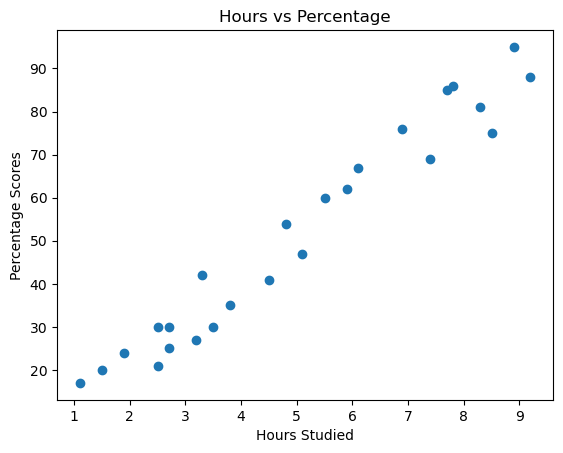

In [43]:
# plotting the distribution graph of scores
x = stud_data['Hours']
y = stud_data['Scores']
plt.scatter(x, y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

### Preparing the data

In [21]:
stud_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [44]:
X = stud_data.iloc[:, :-1].values
y = stud_data.iloc[:, 1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size = 0.2, random_state=0)

In [46]:
# Training the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training is completed")

Training is completed


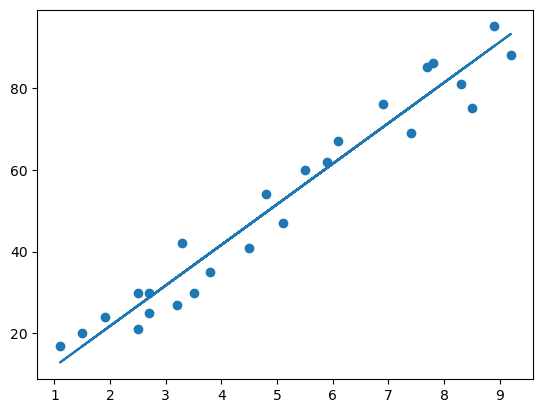

In [34]:
# plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

#### Making Prediction

In [35]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [37]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
# finding scores for 9.25 hours of study per day
hours = 9.25
h = np.array(hours)
h = h.reshape(-1,1)
scores = model.predict(h)
print("Hours studied is",hours)
print("Percentage scored is {}".format(score[0]))

Hours studied is 9.25
Percentage scored is 92.90985477015731


#### Evaluating the model

In [39]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
